PI DATA ANALYTICS

FASE 1

> Visualizacion general del dataset

In [1]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#CARGAMOS EL DATASET EN UN DATAFRAME DE PANDAS
df = pd.read_csv('Internet_Penetracion.csv')
df.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,"76,08"
1,2022,1,Capital Federal,"111,8"
2,2022,1,Catamarca,"58,21"
3,2022,1,Chaco,"44,06"
4,2022,1,Chubut,"88,05"


In [3]:
#VEMOS LA INFORMACION GENERAL DEL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           792 non-null    int64 
 1   Trimestre                     792 non-null    int64 
 2   Provincia                     792 non-null    object
 3   Accesos por cada 100 hogares  792 non-null    object
dtypes: int64(2), object(2)
memory usage: 24.9+ KB


In [4]:
#CONTAMOS LOS VALORES DUPLICADOS
df.duplicated().sum()

0

In [5]:
#CONTAMOS LOS VALORES NULOS
df.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [6]:
#CONTAMOS Y VISUALIZAMOS LOS VALORES QUE TIENE CADA DIMENSIÓN
df.Año.value_counts()

2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
2022    24
Name: Año, dtype: int64

In [7]:
df.Provincia.value_counts()

Buenos Aires           33
Capital Federal        33
Tierra Del Fuego       33
Santiago Del Estero    33
Santa Fe               33
Santa Cruz             33
San Luis               33
San Juan               33
Salta                  33
Río Negro              33
Neuquén                33
Misiones               33
Mendoza                33
La Rioja               33
La Pampa               33
Jujuy                  33
Formosa                33
Entre Ríos             33
Corrientes             33
Córdoba                33
Chubut                 33
Chaco                  33
Catamarca              33
Tucumán                33
Name: Provincia, dtype: int64

FASE 2

> Transformacion y limpieza de los datos

In [8]:
#CAMBIAMOS EL VALOR "CAPITAL FEDERAL" POR "BUENOS AIRES" EN LA COLUMNA PROVINCIA YA QUE AMBOS VALORES HACEN REFERENCIA A UN MISMO LUGAR
df.Provincia.replace("Capital Federal", "Buenos Aires", inplace=True)

In [9]:
#CAMBIAMOS LA "," POR UN "." EN LA COLUMNA ACCESOS POR CADA 100 HOGARES
puntos = [float(x.replace(',','.')) for x in df["Accesos por cada 100 hogares"]]
df["Accesos por cada 100 hogares"] = puntos

In [10]:
#CAMBIAMOS EL TIPO DE DATO EN LAS COLUMNAS Provincia Y Accesos por cada 100 hogares  
df.Provincia = df.Provincia.astype('string')
df.Año = df.Año.astype('string')
df["Accesos por cada 100 hogares"] = df["Accesos por cada 100 hogares"].astype("float")

> Resumen estadistico

In [11]:
#DESCRIBIMOS EL DATASET
df.describe()

,Trimestre,Accesos por cada 100 hogares
count,792.000000,792.000000
mean,2.454545,47.907184
std,1.131306,22.810661
min,1.000000,9.350000
25%,1.000000,31.540000
50%,2.000000,44.625000
75%,3.000000,60.575000
max,4.000000,124.060000


 > Distribuicion de frecuencias

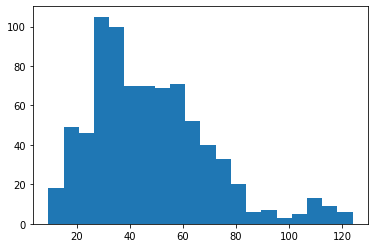

In [12]:
#GRAFICAMOS LA DISTRIBUICION DE FRECUENCIAS 
data = df[['Accesos por cada 100 hogares']]
hist, bin_edges = np.histogram(data, 20)
plt.hist(data, bins=bin_edges)
plt.show()

> Boxplots

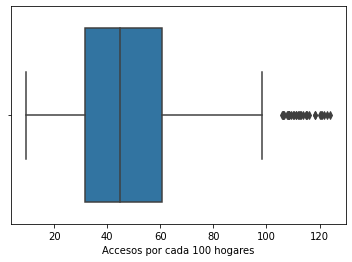

In [13]:
#CON LOS BOXPLOT VEMOS LOS VALORES ATIPICOS EN CADA COLUMNA
sns.boxplot(x = 'Accesos por cada 100 hogares', data = df)
plt.show()

 >Correlacion

In [14]:
#CREAMOS LA CORRELACION
corr = df.corr(method='pearson')

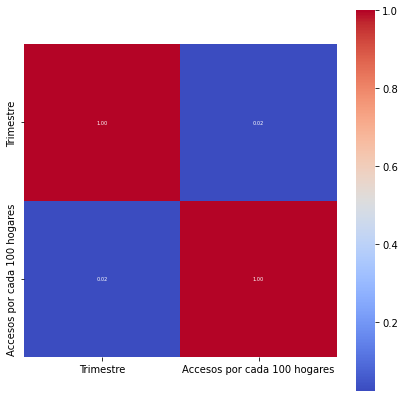

In [15]:
#GRAFICAMOS LA CORRELACION
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 5},
           xticklabels= df.corr().columns, 
           yticklabels= df.corr().columns,
           cmap= 'coolwarm')

plt.show()

FASE 4

In [17]:
#EXPORTAMOS EL CSV PARA TRABAJAR EN POWER BI
df.to_csv("Internet_Penetracion.csv", index=False)